# Predicting LendingClub Loan Status


[LendingClub](https://www.lendingclub.com/) is a US peer-to-peer lending company and the world's largest peer-to-peer lending platform. In this project, we build machine learning models to predict the probability that a loan on LendingClub will charge off (kind of default). These models could help LendingClub investors make better-informed investment decisions.

A charge-off or chargeoff is the declaration by a creditor (usually a credit card account) that an amount of debt is unlikely to be collected. This occurs when a consumer becomes severely delinquent on a debt. Traditionally, creditors will make this declaration at the point of six months without payment. A charge-off is a form of write-off. 

In training the models, we only use features that are known to investors before they choose to invest in the loan.

# Import the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None 
# Close the waring about "A value is trying to be set on a copy of a slice from a DataFrame"

In [3]:
loans = pd.read_csv('loans_num.csv')
loans.head()

,loan_amnt,int_rate,installment,emp_length,dti,log_annual_inc,log_revol_bal,charged_off
0,5000.0,10.65,162.87,10.0,27.65,4.380229,4.135101,False
1,2500.0,15.27,59.83,0.0,1.00,4.477136,3.227372,True
2,2400.0,15.96,84.33,10.0,8.72,4.088242,3.470851,False
3,10000.0,13.49,339.31,10.0,20.00,4.691974,3.748110,False
4,5000.0,7.90,156.46,3.0,11.20,4.556315,3.901131,False


In [4]:
loans.shape

(243074, 8)

In [5]:
loans.describe()

,loan_amnt,int_rate,installment,emp_length,dti,log_annual_inc,log_revol_bal
count,243074.000000,243074.000000,243074.000000,243074.000000,243074.000000,243074.000000,243074.000000
mean,13677.345273,13.762363,421.238995,5.829579,16.500254,4.805452,3.971718
std,8144.728814,4.403093,245.291980,3.621042,7.761498,0.221326,0.559002
min,500.000000,5.320000,15.690000,0.000000,0.000000,3.602169,0.000000
25%,7500.000000,10.740000,243.237500,2.000000,10.740000,4.653222,3.772395
50%,12000.000000,13.530000,368.450000,6.000000,16.155000,4.799347,4.042536
75%,18600.000000,16.550000,550.230000,10.000000,21.920000,4.948418,4.283137
max,35000.000000,28.990000,1424.570000,10.000000,57.140000,6.939848,6.242223


In [6]:
loans['charged_off'].value_counts()

False    200351
True      42723
Name: charged_off, dtype: int64

# Exploratory Data Analysis (EDA)

## loan_amnt

In [7]:
loans['loan_amnt'].describe()

count    243074.000000
mean      13677.345273
std        8144.728814
min         500.000000
25%        7500.000000
50%       12000.000000
75%       18600.000000
max       35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot: xlabel='loan_amnt', ylabel='Count'>

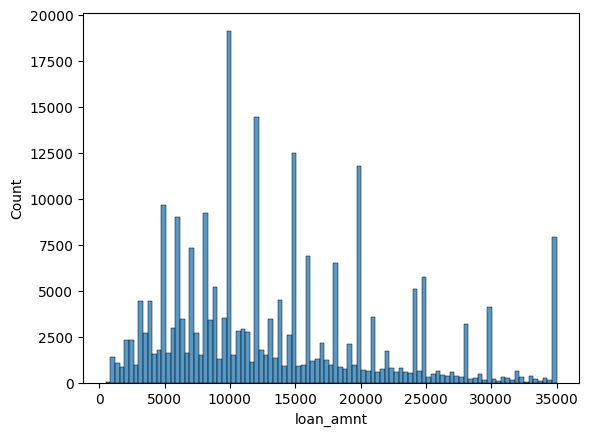

In [8]:
sns.histplot(loans['loan_amnt'])

In [9]:
loans.groupby('charged_off')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
charged_off,,,,,,,,
False,200351.0,13444.853407,8068.970229,500.0,7200.0,12000.0,18000.0,35000.0
True,42723.0,14767.623996,8405.731718,900.0,8100.0,13000.0,20000.0,35000.0


## int_rate

In [10]:
loans['int_rate'].describe()

count    243074.000000
mean         13.762363
std           4.403093
min           5.320000
25%          10.740000
50%          13.530000
75%          16.550000
max          28.990000
Name: int_rate, dtype: float64

<AxesSubplot: xlabel='int_rate', ylabel='Count'>

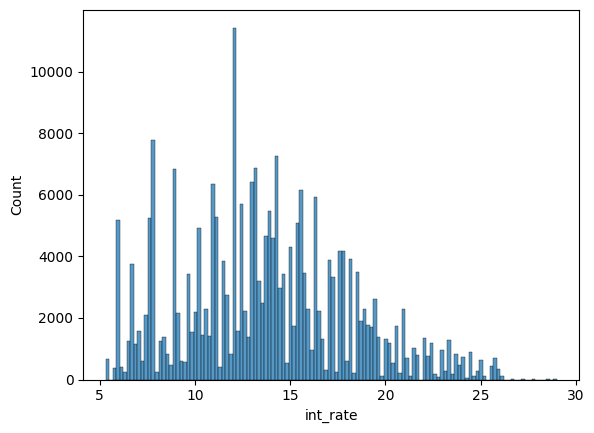

In [11]:
sns.histplot(loans['int_rate']) 

In [12]:
loans.groupby('charged_off')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
charged_off,,,,,,,,
False,200351.0,13.273606,4.267667,5.32,10.16,13.11,15.81,28.99
True,42723.0,16.054408,4.303555,5.42,13.11,15.80,18.99,28.99


## installment

In [13]:
loans['installment'].describe()

count    243074.000000
mean        421.238995
std         245.291980
min          15.690000
25%         243.237500
50%         368.450000
75%         550.230000
max        1424.570000
Name: installment, dtype: float64

<AxesSubplot: xlabel='installment', ylabel='Count'>

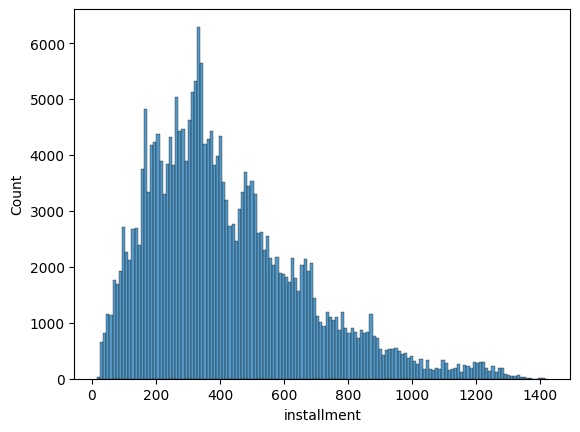

In [14]:
sns.histplot(loans['installment']) 

In [15]:
loans.groupby('charged_off')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
charged_off,,,,,,,,
False,200351.0,415.887101,244.519642,15.69,237.52,363.61,544.26,1409.99
True,42723.0,446.336888,247.344710,21.62,269.91,397.33,578.68,1424.57


## emp_length

In [16]:
loans['emp_length'].value_counts().sort_index()

0.0     20886
1.0     16856
2.0     23561
3.0     20380
4.0     16197
5.0     18059
6.0     14753
7.0     14085
8.0     11849
9.0      9567
10.0    76881
Name: emp_length, dtype: int64

<AxesSubplot: xlabel='emp_length', ylabel='Count'>

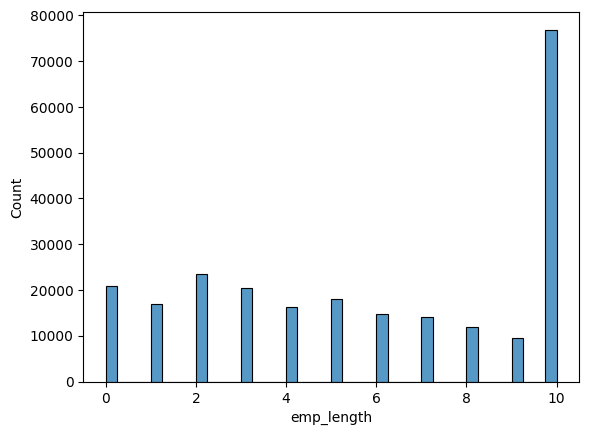

In [17]:
sns.histplot(loans['emp_length'])   

## annual_inc

In [18]:
loans['log_annual_inc'].describe()

count    243074.000000
mean          4.805452
std           0.221326
min           3.602169
25%           4.653222
50%           4.799347
75%           4.948418
max           6.939848
Name: log_annual_inc, dtype: float64

<AxesSubplot: xlabel='log_annual_inc', ylabel='Count'>

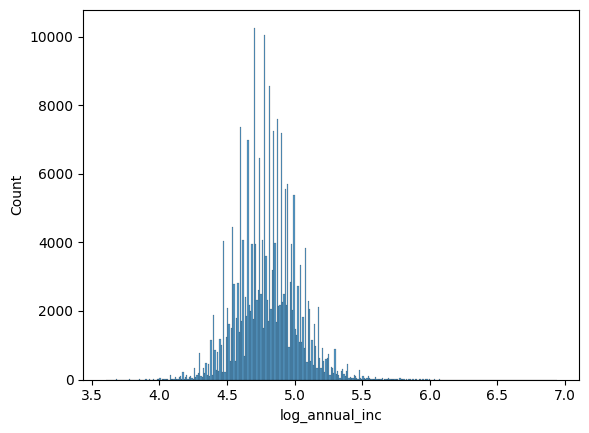

In [19]:
sns.histplot(loans['log_annual_inc'])  

In [20]:
loans.groupby('charged_off')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
charged_off,,,,,,,,
False,200351.0,4.814173,0.221863,3.602169,4.662767,4.812920,4.954247,6.853806
True,42723.0,4.764556,0.214106,3.610767,4.623260,4.763435,4.903095,6.939848


## dti

Data Dictionary: "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."

In [21]:
loans['dti'].describe()

count    243074.000000
mean         16.500254
std           7.761498
min           0.000000
25%          10.740000
50%          16.155000
75%          21.920000
max          57.140000
Name: dti, dtype: float64

<AxesSubplot: xlabel='dti', ylabel='Count'>

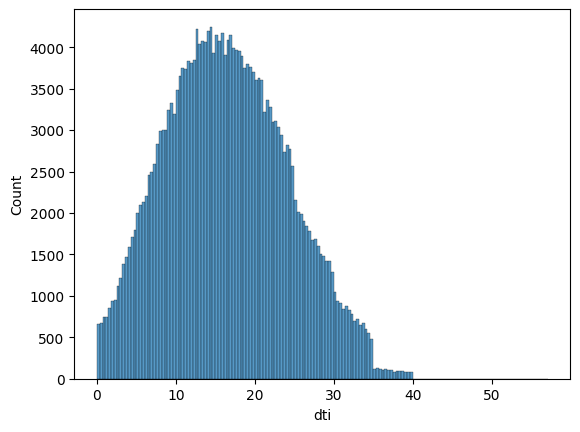

In [22]:
sns.histplot(loans['dti'])  

In [23]:
loans.groupby('charged_off')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
charged_off,,,,,,,,
False,200351.0,16.107442,7.670566,0.0,10.41,15.72,21.430,57.14
True,42723.0,18.342360,7.918710,0.0,12.53,18.29,24.005,39.98


## revol_bal

Data Dictionary: "Total credit revolving balance."

<AxesSubplot: xlabel='log_revol_bal', ylabel='Count'>

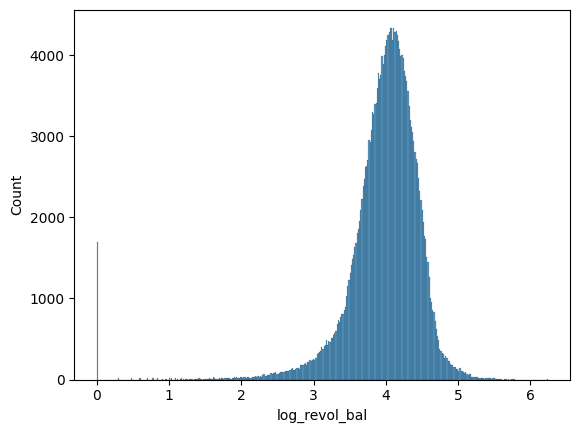

In [24]:
sns.histplot(loans['log_revol_bal'])  

In [25]:
loans.groupby('charged_off')['log_revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
charged_off,,,,,,,,
False,200351.0,3.967678,0.564640,0.0,3.766264,4.038620,4.282259,6.241364
True,42723.0,3.990665,0.531366,0.0,3.801472,4.060055,4.287455,6.242223
